# Index
* [Dataset Analisys](#cap1)
  * [belongs_to_collection](#belongs_to_collection)
  * [budget](#budget)
  * [genres](#genres)
  * [homepage](#homepage)
  * [imdb_id](#imdb_id) 
  * [original_language](#original_language)
  * [original_title](#original_title)
  * [overview](#overview)
  * [popularity](#popularity)
  * [poster_path](#poster_path)
  * [production_companies](#production_companies)
  * [production_countries](#production_countries)
  * [release_date](#release_date)
  * [runtime](#runtime)
  * [spoken_languages](#spoken_languages)
  * [status](#status)
  * [tagline](#tagline)
  * [title](#title)
  * [Keywords](#Keywords)
  * [cast](#cast)
  * [crew](#crew)
  * [revenue](#revenue)
* [Feature Selection](#cap2)
* [Model creation](#cap3)

In [3]:
# Libraries
import pandas as pd
import ast
import numpy as np
from wordcloud import WordCloud
import math

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, median_absolute_error,explained_variance_score,r2_score
# Matplot
import matplotlib.pyplot as plt
import seaborn as sns

# Bokeh area
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

## Dataset Analisys <a class="anchor" id="cap1"></a>
Load data and show the row table.

In [4]:
train = pd.read_csv('../input/train.csv')
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
train.head(1)

id                              belongs_to_collection    budget  \
0   1  [{'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U...  14000000   

                           genres homepage    imdb_id original_language  \
0  [{'name': 'Comedy', 'id': 35}]      NaN  tt2637294                en   

           original_title                                           overview  \
0  Hot Tub Time Machine 2  When Lou, who has become the "father of the In...   

   popularity  ... release_date runtime  \
0    6.575393  ...      2/20/15    93.0   

                           spoken_languages    status  \
0  [{'name': 'English', 'iso_639_1': 'en'}]  Released   

                                             tagline                   title  \
0  The Laws of Space and Time are About to be Vio...  Hot Tub Time Machine 2   

                                            Keywords  \
0  [{'name': 'time travel', 'id': 4379}, {'name':...   

                                                cast  \
0  [{'order': 0, 'credit_id': '52fe4ee7c3a36847f8...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'na...  12314651  

[1 rows x 23 columns]

Analize the number of data.

In [5]:
train.shape

(3000, 23)

### belongs_to_collection <a class="anchor" id="belongs_to_collection"></a>
This collection contain no value or one only.


In [6]:
counts_values = train['belongs_to_collection'].apply(lambda x: 'size_%d' % len(x) if x != {} else 'empty').value_counts()
x = []
y = []
for i, v in counts_values.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, title="Count of null or full")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

In [7]:
belongs_to_collection = []
for cps in train['belongs_to_collection']:
    for cp in cps:
        belongs_to_collection.append(cp['name'])
comp = pd.Series(belongs_to_collection).value_counts()
comp.sort_index(inplace=False)
comp = comp[:10]
x = []
y = []
for i, v in comp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Top 10 keywords")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
p.xaxis.major_label_orientation = 0.3
show(p)

### budget <a class="anchor" id="budget"></a>
The budget go from 0 to $3,8 \cdot 10^8$ with a mean of $2,2 \cdot 10^7$.

In [8]:
budgets = train['budget']
mean_value = np.mean(budgets)
max_value = np.max(budgets)
min_value = np.min(budgets)
median_value = np.median(budgets)
x = ['min', 'median','mean', 'max']
y = [min_value, median_value, mean_value, max_value]
p = figure(x_range=x, plot_height=250, title="Value analysys")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

### genres <a class="anchor" id="genres"></a>

In [9]:
number_of_genres_for_film = train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()
number_of_genres_for_film.sort_index(inplace=True)
x = []
y = []
for i, v in number_of_genres_for_film.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, title="Count of genres in films")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

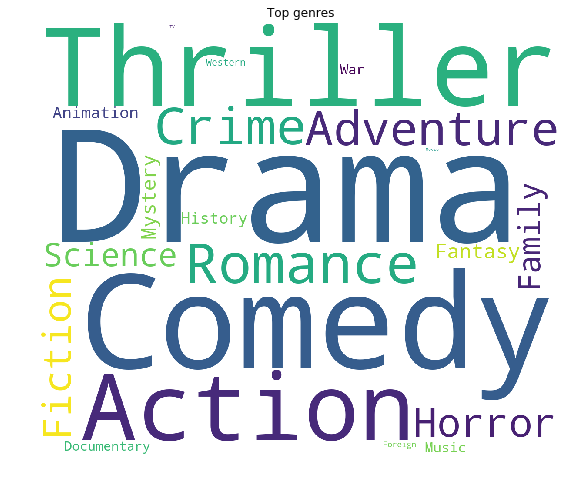

In [10]:
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

### homepage <a class="anchor" id="homepage"></a>

In [11]:
hp = train['homepage'].apply(lambda x: 'Have HP' if not isinstance(x, float) else 'NaN').value_counts()
x = []
y = []
for i, v in hp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, title="Homepage Count")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

### imdb_id  <a class="anchor" id="imdb_id"></a>
This is the id into the original database.

### original_language <a class="anchor" id="original_language"></a>

In [12]:
number_of_genres_for_film = train['original_language'].value_counts()
number_of_genres_for_film.sort_index(inplace=False)
x = []
y = []
for i, v in number_of_genres_for_film.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Count of original language in films")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

### original_title <a class="anchor" id="original_title"></a>

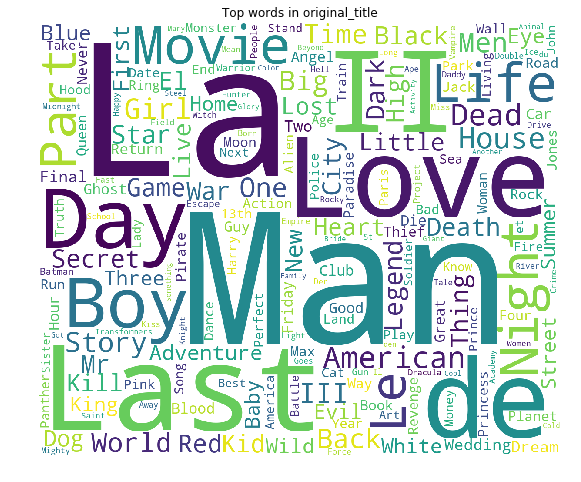

In [13]:
text = ''

for line in train['original_title']:
    text += ' ' + line

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.title('Top words in original_title')
plt.axis("off")
plt.show()

### overview <a class="anchor" id="overview"></a>

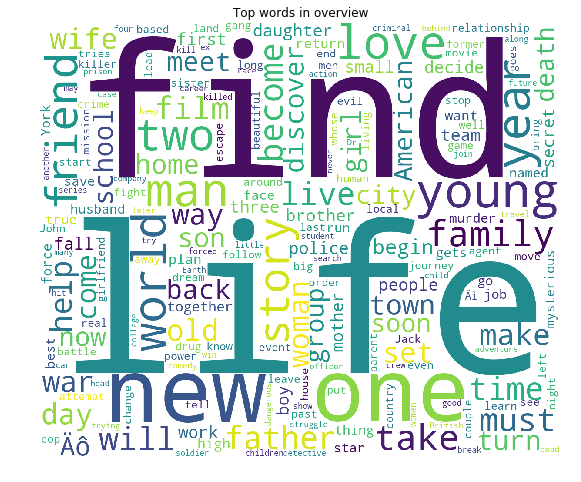

In [14]:
text = ''

for line in train['overview']:
    if not isinstance(line, float):
        text += ' ' + line

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

### popularity <a class="anchor" id="popularity"></a>

In [15]:
popularity = train['popularity']
mean_value = np.mean(popularity)
max_value = np.max(popularity)
min_value = np.min(popularity)
median_value = np.median(popularity)
x = ['min', 'median','mean', 'max']
y = [min_value, median_value, mean_value, max_value]
p = figure(x_range=x, plot_height=250, title="Value analysys")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

### poster_path <a class="anchor" id="poster_path"></a>

In [16]:
hp = train['poster_path'].apply(lambda x: 'Have poster' if not isinstance(x, float) else 'NaN').value_counts()
x = []
y = []
for i, v in hp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, title="Homepage Count")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

### production_companies <a class="anchor" id="production_companies"></a>

In [17]:
production_companies = train['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()
production_companies.sort_index(inplace=True)
x = []
y = []
for i, v in production_companies.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, title="Count of production companies in films")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

In [18]:
companies = []
for cps in train['production_companies']:
    for cp in cps:
        companies.append('(%d) %s' % (cp['id'], cp['name']))
comp = pd.Series(companies).value_counts()
comp.sort_index(inplace=False)
comp = comp[:10]
x = []
y = []
for i, v in comp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Top 10 Count of companies in films")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
p.xaxis.major_label_orientation = 0.3
show(p)

### production_countries  <a class="anchor" id="production_countries"></a>

In [19]:
production_countries = train['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts()
production_countries.sort_index(inplace=True)
x = []
y = []
for i, v in production_countries.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, title="Count of production countries in films")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

In [20]:
production_countries = []
for cps in train['production_countries']:
    for cp in cps:
        production_countries.append(cp['name'])
comp = pd.Series(production_countries).value_counts()
comp.sort_index(inplace=False)
comp = comp[:10]
x = []
y = []
for i, v in comp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Top 10 production country in films")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
p.xaxis.major_label_orientation = 0.3
show(p)

### release_date <a class="anchor" id="release_date"></a>

In [21]:
release_date = []
for cps in train['release_date']:
    release_date.append(cps[:-3])
comp = pd.Series(release_date).value_counts()
comp.sort_index(inplace=False)
comp = comp[:20]
x = []
y = []
for i, v in comp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Top 20 release date")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
p.xaxis.major_label_orientation = 0.3
show(p)

### runtime <a class="anchor" id="runtime"></a>

In [22]:
runtime = train['runtime'].fillna(0.0)
mean_value = np.mean(runtime)
max_value = np.max(runtime)
min_value = np.min(runtime)
median_value = np.median(runtime) 
x = ['min', 'median','mean', 'max']
y = [min_value, median_value, mean_value, max_value]
p = figure(x_range=x, plot_height=250, title="Runtime analysys")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

### spoken_languages <a class="anchor" id="spoken_languages"></a>

In [23]:
spoken_languages = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()
spoken_languages.sort_index(inplace=True)
x = []
y = []
for i, v in spoken_languages.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, title="Count of spoken languages")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

In [24]:
spoken_languages = []
for cps in train['spoken_languages']:
    for cp in cps:
        spoken_languages.append(cp['name'])
comp = pd.Series(spoken_languages).value_counts()
comp.sort_index(inplace=False)
comp = comp[:6]
x = []
y = []
for i, v in comp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Top 6 spoken lenguages")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
p.xaxis.major_label_orientation = 0.3
show(p)

### status <a class="anchor" id="status"></a>

In [25]:
status = train['status'].value_counts()
status.sort_index(inplace=True)
x = []
y = []
for i, v in status.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, title="Count of status")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

### tagline <a class="anchor" id="tagline"></a>

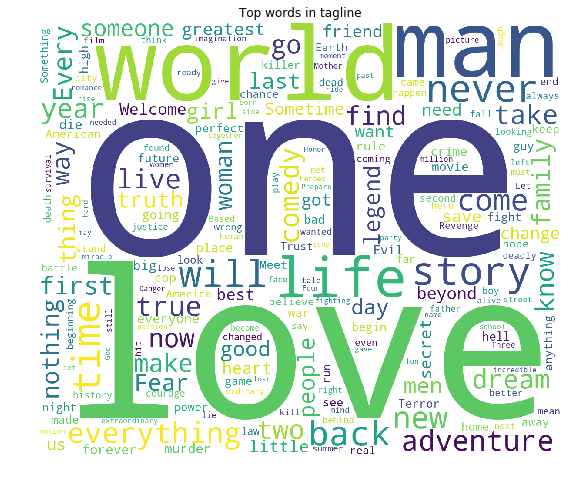

In [26]:
text = ''

for line in train['tagline']:
    if not isinstance(line, float):
        text += ' ' + line

plt.figure(figsize = (12, 8))
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

### title <a class="anchor" id="title"></a>

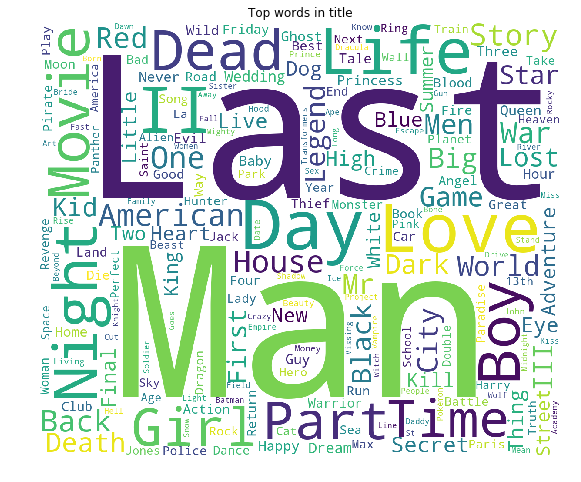

In [27]:
text = ''

for line in train['title']:
    if not isinstance(line, float):
        text += ' ' + line

plt.figure(figsize = (12, 8))        
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in title')
plt.axis("off")
plt.show()

### Keywords <a class="anchor" id="Keywords"></a>

In [28]:
keywords = train['Keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts()
keywords.sort_index(inplace=True)
x = []
y = []
for i, v in keywords.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Count of keywords")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

In [29]:
keywords = []
for cps in train['Keywords']:
    for cp in cps:
        keywords.append(cp['name'])
comp = pd.Series(keywords).value_counts()
comp.sort_index(inplace=False)
comp = comp[:10]
x = []
y = []
for i, v in comp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Top 10 keywords")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
p.xaxis.major_label_orientation = 0.3
show(p)

### cast <a class="anchor" id="cast"></a>

In [30]:
cast = train['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts()
cast.sort_index(inplace=False)
x = []
y = []
for i, v in cast[:30].items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Top 30 count of cast members")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

In [31]:
cast = []
for cps in train['cast']:
    for cp in cps:
        cast.append('(%d) %s' % (cp['id'], cp['name']))
comp = pd.Series(cast).value_counts()
comp.sort_index(inplace=False)
comp = comp[:10]
x = []
y = []
for i, v in comp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=300, plot_width=900, title="Top 10 cast members")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
p.xaxis.major_label_orientation = 0.3
show(p)

### crew <a class="anchor" id="crew"></a>

In [32]:
crew = train['crew'].apply(lambda x: len(x) if x != {} else 0).value_counts()
crew.sort_index(inplace=False)
x = []
y = []
for i, v in crew[:30].items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=250, plot_width=900, title="Top 30 count of crew members")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

In [33]:
crew = []
for cps in train['crew']:
    for cp in cps:
        crew.append('(%d) %s' % (cp['id'], cp['name']))
comp = pd.Series(crew).value_counts()
comp.sort_index(inplace=False)
comp = comp[:15]
x = []
y = []
for i, v in comp.items():
    x.append(str(i))
    y.append(v)
p = figure(x_range=x, plot_height=300, plot_width=900, title="Top 15 crew members")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
p.xaxis.major_label_orientation = 0.3
show(p)

### revenue <a class="anchor" id="revenue"></a>

In [34]:
revenue = train['revenue'].fillna(0.0)
mean_value = np.mean(revenue)
max_value = np.max(revenue)
min_value = np.min(revenue)
median_value = np.median(revenue) 
x = ['min', 'median','mean', 'max']
y = [min_value, median_value, mean_value, max_value]
p = figure(x_range=x, plot_height=250, title="Revenue analysys")
p.vbar(x=x, top=y, width=0.9)
p.add_tools(HoverTool(tooltips=[('value', '@top')]))
show(p)

## Feature Selection <a class="anchor" id="cap2"></a>

## Budget vs Revenue

In [35]:
revenue = train['revenue'].fillna(0.0)
budget = train['budget'].fillna(0.0)

p = figure(plot_width=900, plot_height=400, title="Revenue vs Budgets")
p.circle(revenue, budget, alpha=0.5)
show(p)

## Genres vs Revenue

In [36]:
revenue = train['revenue'].fillna(0.0)
budget = train['genres'].fillna(0.0)

p = figure(plot_width=900, plot_height=400, title="Revenue vs Budgets")
p.circle(revenue, budget, alpha=0.5)
show(p)

## Model Creation <a class="anchor" id="cap3"></a>

In [37]:
x = train[['budget', 'popularity']]
y = train['revenue'].fillna(0.0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

clf = ExtraTreeRegressor(random_state=0)
clf.fit(x_train, y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=0, splitter='random')

In [38]:
predictions = clf.predict(x_test)
print("mean_squared_error: ", mean_squared_error(y_test, predictions))
print("mean_squared_log_error: ", mean_squared_log_error(y_test, predictions))
print("mean_absolute_error: ", mean_absolute_error(y_test, predictions))
print("median_absolute_error: ", median_absolute_error(y_test, predictions))
print("explained_variance_score: ", explained_variance_score(y_test, predictions))
print("r2_score: ", r2_score(y_test, predictions))

mean_squared_error:  1.4543331087490386e+16
mean_squared_log_error:  10.202220287617738
mean_absolute_error:  57306740.448484845
median_absolute_error:  19528092.5
explained_variance_score:  0.16178496501465145
r2_score:  0.15259010232388703
